GMM (Gaussian Mixture Model), KDE ( Kernel Density Estimation), KNN, and K-Means

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import seaborn as sns
from IPython import display 

In [4]:
#plt.hist(x = [wines["fixed acidity"],wines["volatile acidity"], wines["residual sugar"], wines["alcohol"]], bins = 100)
#plt.rcParams['figure.figsize'] = [5, 5]
#wines.cov()
#plt.scatter(whiteWine["total sulfur dioxide"],whiteWine["fixed acidity"], c= whiteWine['quality'])

#plt.hist(wines["total sulfur dioxide"],c= wines['quality'] )
#plt.plot(wines["total sulfur dioxide"])


   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm        class  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  
                    sepal length in cm  sepal width in cm  petal length in cm  \
sepal length in cm            0.685694          -0.039268            1.273682   
sepal width in cm            -0.039268           0.188004           -0.321713   
petal length in cm            1.273682          -0.321713            3.113179   
petal width in cm             0.516904          -0.117981            1.2963

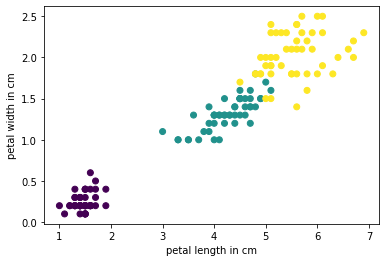

In [5]:
iris = pd.read_csv("iris.data", names = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm", "class"])
print(iris.head())
print(iris.cov())
print(iris["petal length in cm"].describe())

# label encode the class so can plot as color on a scatter plot
encoder = LabelEncoder()
iris["class_encoding"] = encoder.fit_transform(iris["class"])
plt.figure(0)
plt.xlabel("petal length in cm")
plt.ylabel("petal width in cm")
plt.scatter(x=iris["petal length in cm"], y=iris["petal width in cm"], c= iris["class_encoding"])


<Figure size 432x288 with 0 Axes>

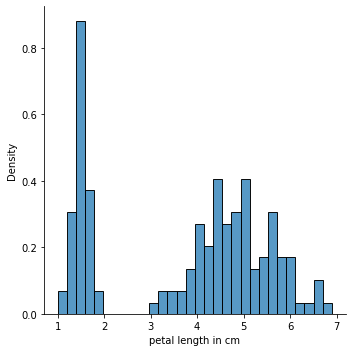

In [6]:
plt.figure(1)
sns.displot(iris["petal length in cm"], stat = "density", bins= 30)

### Gaussian 

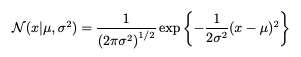

In [7]:
display.Image("Univariate_Gaussian.png")

<Figure size 432x288 with 0 Axes>

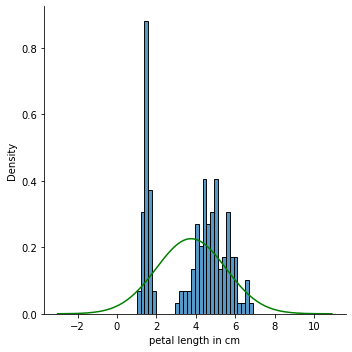

In [8]:
x = np.arange(-3,11,0.1)
y = stats.norm(iris["petal length in cm"].mean(),iris["petal length in cm"].std()).pdf(x)
plt.figure(2)
sns.displot(iris["petal length in cm"], stat = "density", bins= 30)
plt.plot(x, y, label = "Univariate Gaussian", c= "g")

### Gaussian Mixture Model (GMM)
A sum of weighted Gaussians\
$ p(x) = \sum \limits _{k=1}^{K}π_{k}\cal{N}(x | μ_{k},σ_{k}^2) $

$ 0 ≤ π_{k} ≤ 1 $

$ \sum \limits _{k=1}^{K} π_{k} = 1 $

K = # of gaussians to fit to data

#### Expectation Step
Calulate the likelihood of observations x with the learning parameters using pdf for normal distribution

$ \cal{N}(x | μ_{k},σ_{k}^2) = \frac{1}{(2\pi\sigma^2)^{1/2}} exp \bigg\{\frac{-1}{2\sigma^2}(x-\mu)^2\bigg\} $

#### Maximization Step
$ \gamma_{k}$ is the likelihood that a given observation x belongs the the Kth gaussian

$ \gamma_{k} = \frac{π_{k}\cal{N}(x | μ_{k},σ_{k}^2)}{\sum \limits _{k=1}^{K}π_{k}\cal{N}(x | μ_{k},σ_{k}^2)} $

Re-evalute the learning parameters $\mu_{k},\sigma_{k}^2,\pi_{k}$

$ \mu_{k} = \frac{\sum \gamma_{k}x}{\sum \gamma_{k}} $

$ \sigma_{k}^2 = \frac{\sum\gamma_{k}(x-\mu_{k})^2}{\sum \gamma_{k}}$

$ \pi_{k} = \frac{1}{N}\sum\gamma_{k} $



### Expectation Maximization


In [22]:
# try to fit two gaussians
K=2
mean = np.array([1,7])
variance = np.array([0.1,0.5])
# start with it being equal likelihood that observation comes from either gaussian 
weight = np.array([0.5,0.5])

notConverged = True

while notConverged:
    priorMean = np.copy(mean)
    priorVar = np.copy(variance)
    priorWeight = np.copy(weight)
    print(priorMean,priorVar,priorWeight)
    # Expectation step
    likelihoodList = []
    for k in range(K):
        y = stats.norm(mean[k],np.sqrt(variance[k])).pdf(iris["petal length in cm"])
        likelihoodList.append(y)
    likelihood = np.array(likelihoodList)

    # Maximization step
    gamma = []
    sum = np.sum(likelihood[k]*weight[k] for k in range(K))
    for k in range(K):
        gamma.append((likelihood[k]*weight[k])/sum)
        # update step
        mean[k] = np.sum(gamma[k]*iris["petal length in cm"] / np.sum(gamma[k]))
        variance[k] = np.sum(gamma[k]* np.square(iris["petal length in cm"] - mean[k])) / np.sum(gamma[k])
        weight[k] = np.mean(gamma[k])
    
    if (priorMean == mean).all() and (priorVar == variance).all() and (priorWeight == weight).all():
        notConverged = False
    
    mvw = pd.DataFrame([mean,priorMean,variance,priorVar,weight,priorWeight])
    mvw = mvw.transpose()
    mvw.columns = ["mean","prior mean","variance","prior variance","weight","prior weight"]
    print(mvw)


[1 7] [0.1 0.5] [0.5 0.5]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.247754             0.1  0.333596           0.5
1   4.0         7.0  1.495795             0.5  0.666404           0.5
[1 4] [0.24775384 1.49579519] [0.33359571 0.66640429]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.227217        0.247754  0.283624      0.333596
1   4.0         4.0  1.807843        1.495795  0.716376      0.666404
[1 4] [0.22721662 1.80784318] [0.28362421 0.71637579]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.221060        0.227217  0.260143      0.283624
1   4.0         4.0  1.947277        1.807843  0.739857      0.716376
[1 4] [0.22106049 1.94727716] [0.26014313 0.73985687]
   mean  prior mean  variance  prior variance   weight  prior weight
0   1.0         1.0  0.218299        0.221060  0.24847      0.260143
1   4.0         4.0  2.014386        1.94727

<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) o

   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215407  0.235792      0.235795
1   4.0         4.0  2.085525        2.085507  0.764208      0.764205
[1 4] [0.2154064  2.08552479] [0.23579181 0.76420819]
   mean  prior mean  variance  prior variance   weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.23579      0.235792
1   4.0         4.0  2.085534        2.085525  0.76421      0.764208
[1 4] [0.21540602 2.08553413] [0.23579013 0.76420987]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235789       0.23579
1   4.0         4.0  2.085539        2.085534  0.764211       0.76421
[1 4] [0.21540581 2.08553912] [0.23578923 0.76421077]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235789      0.235789
1   4.0         4.0  2.085542        2.085539  0.764211      0.764211
[

<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) o

   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235788      0.235788
1   4.0         4.0  2.085545        2.085545  0.764212      0.764212
[1 4] [0.21540558 2.08554486] [0.23578819 0.76421181]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235788      0.235788
1   4.0         4.0  2.085545        2.085545  0.764212      0.764212
[1 4] [0.21540558 2.08554487] [0.23578819 0.76421181]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235788      0.235788
1   4.0         4.0  2.085545        2.085545  0.764212      0.764212
[1 4] [0.21540558 2.08554487] [0.23578819 0.76421181]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235788      0.235788
1   4.0         4.0  2.085545        2.085545  0.764212      0.76421

<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) o


[1 4] [0.21540558 2.08554488] [0.23578819 0.76421181]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235788      0.235788
1   4.0         4.0  2.085545        2.085545  0.764212      0.764212
[1 4] [0.21540558 2.08554488] [0.23578819 0.76421181]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235788      0.235788
1   4.0         4.0  2.085545        2.085545  0.764212      0.764212
[1 4] [0.21540558 2.08554488] [0.23578819 0.76421181]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235788      0.235788
1   4.0         4.0  2.085545        2.085545  0.764212      0.764212
[1 4] [0.21540558 2.08554488] [0.23578819 0.76421181]
   mean  prior mean  variance  prior variance    weight  prior weight
0   1.0         1.0  0.215406        0.215406  0.235788      0.235788
1   4.0      

<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum = np.sum(likelihood[k]*weight[k] for k in range(K))
<ipython-input-22-9e88f5ad8622>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) o

In [ ]:
def EM:
    

In [46]:
# Maximization step
gamma = []
sum = 0
for k in range(k):
    sum = sum + likelihood.iloc[k]*weight[k]
for k in range(K):
    gamma.append((likelihood.iloc[k]*weight[k])/sum)
    # update step
    mean[k] = np.sum(gamma[k]*iris["petal length in cm"] / np.sum(gamma[k]))
    variance[k] = np.sum(gamma[k]* np.square(iris["petal length in cm"] - mean[k])) / np.sum(gamma[k])
    weight[k] = np.mean(gamma[k])
mvw = pd.DataFrame([mean,variance,weight])
mvw = mvw.transpose()
mvw.columns = ["mean","variance","weight"]
mvw

,mean,variance,weight
0,0.0,0.0,1.0
1,0.0,0.0,1.0


### Gaussian Multivariate

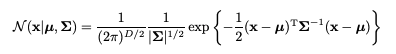

In [80]:
display.Image("Multivariate_Gaussian.png")

Σ = a DxD dimensional covariance matrix

µ = a D-Dimensional mean vector

|Σ| = determinant of Σ
